In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('data/Jude_RVO.xlsx')

In [7]:
df.sort_values('Start Time', ascending=True).head()

,Building/Room,Title,Course/Reservation,Subject,Date,Day of Week,Start Time,End Time,Enrolled,Max Enroll,Avg Occu,Attend,Normal > 50%
657,Building A 3047,Setup - Open Partition,20221213-00005- Mtg: 1,Enrollment and Student Services,2023-01-08,Sunday,00:00:00,23:59:00,0,2,0.224401,0.0,Low
656,Building A 3047,Setup - Open Partition,20221213-00005- Mtg: 1,Enrollment and Student Services,2023-01-08,Sunday,00:00:00,23:59:00,0,2,0.224401,0.0,Low
655,Building A 3047,Setup - Open Partition,20221213-00005- Mtg: 1,Enrollment and Student Services,2023-01-08,Sunday,00:00:00,23:59:00,0,2,0.224401,0.0,Low
893,Building A 3047,Setup - Open Partition,20221213-00005- Mtg: 1,Enrollment and Student Services,2023-01-09,Monday,00:00:00,07:30:00,0,2,0.211514,0.0,Low
892,Building A 3047,Setup - Open Partition,20221213-00005- Mtg: 1,Enrollment and Student Services,2023-01-09,Monday,00:00:00,07:30:00,0,2,0.211514,0.0,Low


In [8]:
df['Attend'] = df['Attend'].apply(lambda x: x * 100)

In [10]:
simple = df[['Title', 'Attend', 'Normal > 50%', 'Start Time']].set_index('Start Time').sort_values(['Start Time', 'Attend'], ascending=[True, False])

In [62]:
time_grp = df.groupby(['Start Time'])
df2 = time_grp['Attend'].mean()

In [60]:
df['Start Time'] = df['Start Time'].astype(str)

In [67]:
filt = df['Start Time'] == '10:30:00'

In [75]:
above_100 = time_grp['Attend'].mean() >= 100.0

In [84]:
df2.loc[above_100]

Start Time
09:30:00    134.862693
10:30:00    325.040152
13:30:00    110.333142
Name: Attend, dtype: float64

<Axes: xlabel='Start Time'>

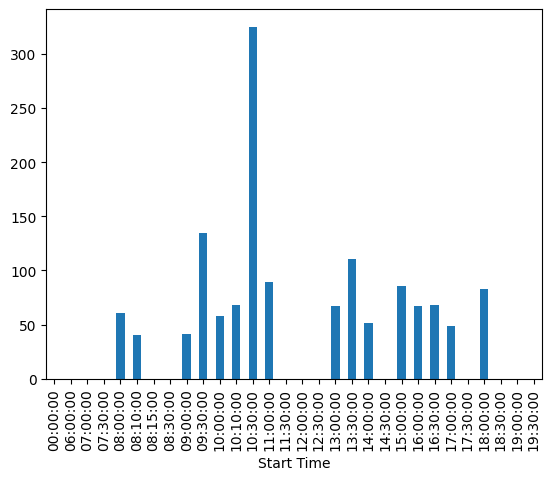

In [87]:
df2.plot.bar()